In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')
import os
import datetime
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler

In [2]:
# Load data from URL using pandas read_csv method
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00616/Tetuan%20City%20power%20consumption.csv')

In [3]:
# Setting index to Datetime
df = df.set_index('DateTime')
df.index = pd.to_datetime(df.index)

# Visualizing dataset first 5 records
df.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
DateTime,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [ ]:
df.shape

(52416, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52416 entries, 2017-01-01 00:00:00 to 2017-12-30 23:50:00
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Temperature                52416 non-null  float64
 1   Humidity                   52416 non-null  float64
 2   Wind Speed                 52416 non-null  float64
 3   general diffuse flows      52416 non-null  float64
 4   diffuse flows              52416 non-null  float64
 5   Zone 1 Power Consumption   52416 non-null  float64
 6   Zone 2  Power Consumption  52416 non-null  float64
 7   Zone 3  Power Consumption  52416 non-null  float64
dtypes: float64(8)
memory usage: 3.6 MB


In [ ]:
df.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


# EDA

In [4]:
df.rename(columns={'Zone 1 Power Consumption': 'Zone1'}, inplace=True)
df.rename(columns={'Zone 2  Power Consumption': 'Zone2'}, inplace=True)
df.rename(columns={'Zone 3  Power Consumption': 'Zone3'}, inplace=True)

In [5]:
df['hour'] = df.index.hour
df['minute'] = df.index.minute
df['dayofweek'] = df.index.dayofweek
df['quarter'] = df.index.quarter
df['month'] = df.index.month
df['year'] = df.index.year
df['dayofyear'] = df.index.dayofyear
df['dayofmonth'] = df.index.day
df['weekofyear'] = df.index.isocalendar().week

In [ ]:
df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows',
       'diffuse flows', 'Zone1', 'Zone2', 'Zone3', 'hour', 'minute',
       'dayofweek', 'quarter', 'month', 'year', 'dayofyear', 'dayofmonth',
       'weekofyear'],
      dtype='object')

In [ ]:
# Checking for missing values
df[df.isnull().any(axis=1)]

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone1,Zone2,Zone3,hour,minute,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
DateTime,,,,,,,,,,,,,,,,,


In [ ]:
df.isnull().sum()

Temperature              0
Humidity                 0
Wind Speed               0
general diffuse flows    0
diffuse flows            0
Zone1                    0
Zone2                    0
Zone3                    0
hour                     0
minute                   0
dayofweek                0
quarter                  0
month                    0
year                     0
dayofyear                0
dayofmonth               0
weekofyear               0
dtype: int64

In [ ]:
df[df["Zone1"] ==df["Zone1"].max()]

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone1,Zone2,Zone3,hour,minute,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
DateTime,,,,,,,,,,,,,,,,,
2017-08-07 20:20:00,27.24,78.0,4.904,1.436,1.159,52204.39512,36129.25026,41018.18182,20,20,0,3,8,2017,219,7,32


In [ ]:
df[df["Zone1"] ==df["Zone1"].min()]

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone1,Zone2,Zone3,hour,minute,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
DateTime,,,,,,,,,,,,,,,,,
2017-01-15 07:30:00,9.97,86.3,0.083,0.055,0.122,13895.6962,15749.54407,11184.57831,7,30,6,1,1,2017,15,15,2


<Axes: >

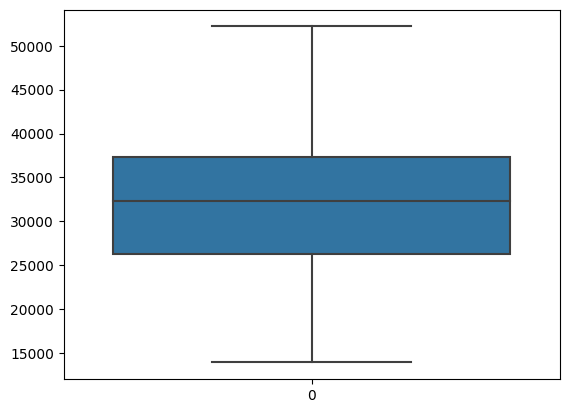

In [ ]:
sns.boxplot(df['Zone1'])

<Axes: xlabel='Zone1', ylabel='Density'>

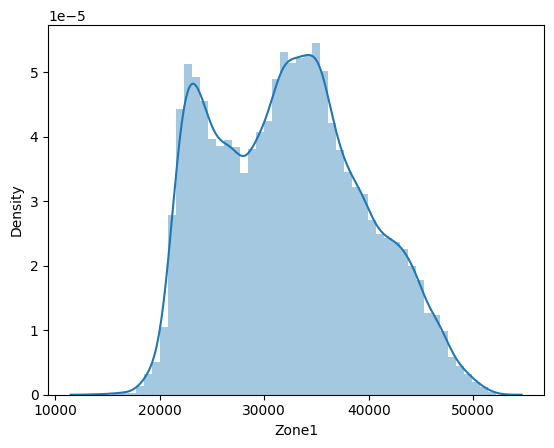

In [ ]:
sns.distplot(df["Zone1"])

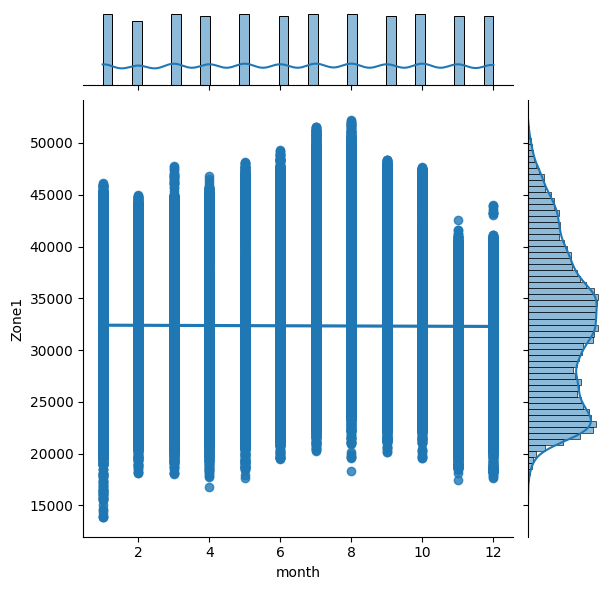

In [ ]:
sns.jointplot(x=df["month"],
             y=df["Zone1"],
             data=df,
             kind="reg")

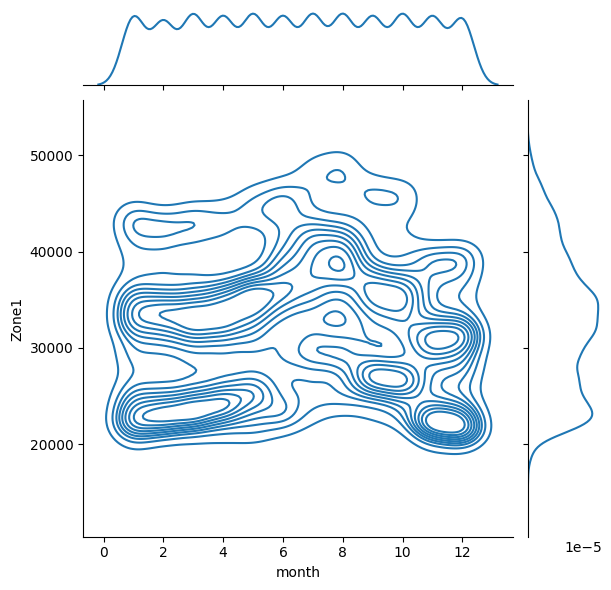

In [ ]:
sns.jointplot(x=df["month"],
             y=df["Zone1"],
             data=df,
             kind="kde")

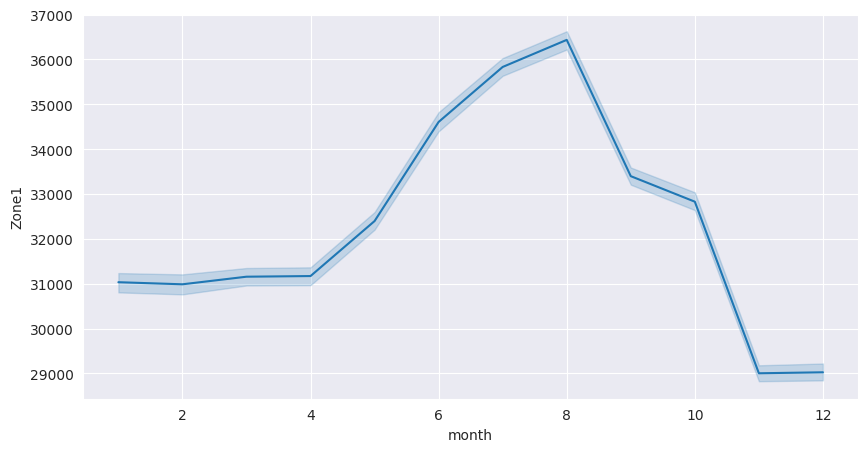

In [ ]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.lineplot(data=df, x="month", y="Zone1")
plt.show()

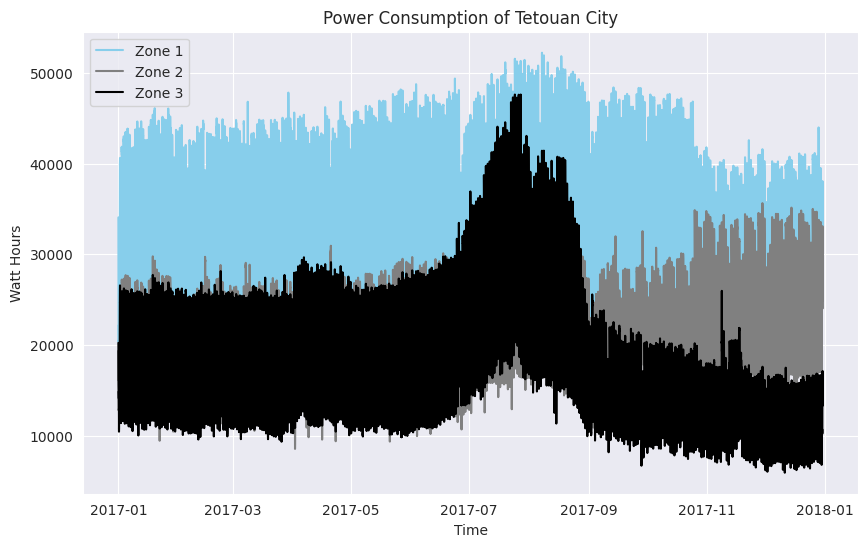

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['Zone1'], color='skyblue', label='Zone 1')
plt.plot(df['Zone2'], color='gray', label='Zone 2')
plt.plot(df['Zone3'], color='black', label='Zone 3')
plt.xlabel('Time')
plt.ylabel('Watt Hours')
plt.title('Power Consumption of Tetouan City')
plt.legend(loc='upper left')
plt.show()

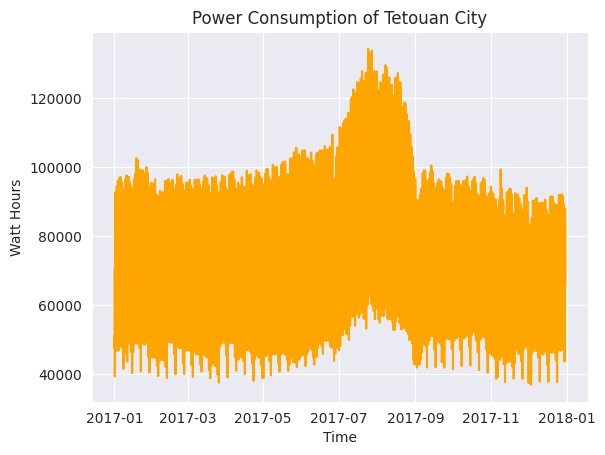

In [ ]:
plt.plot(df['total_power'], color='orange', label='Total Power')
plt.xlabel('Time')
plt.ylabel('Watt Hours')
plt.title('Power Consumption of Tetouan City')
plt.show()

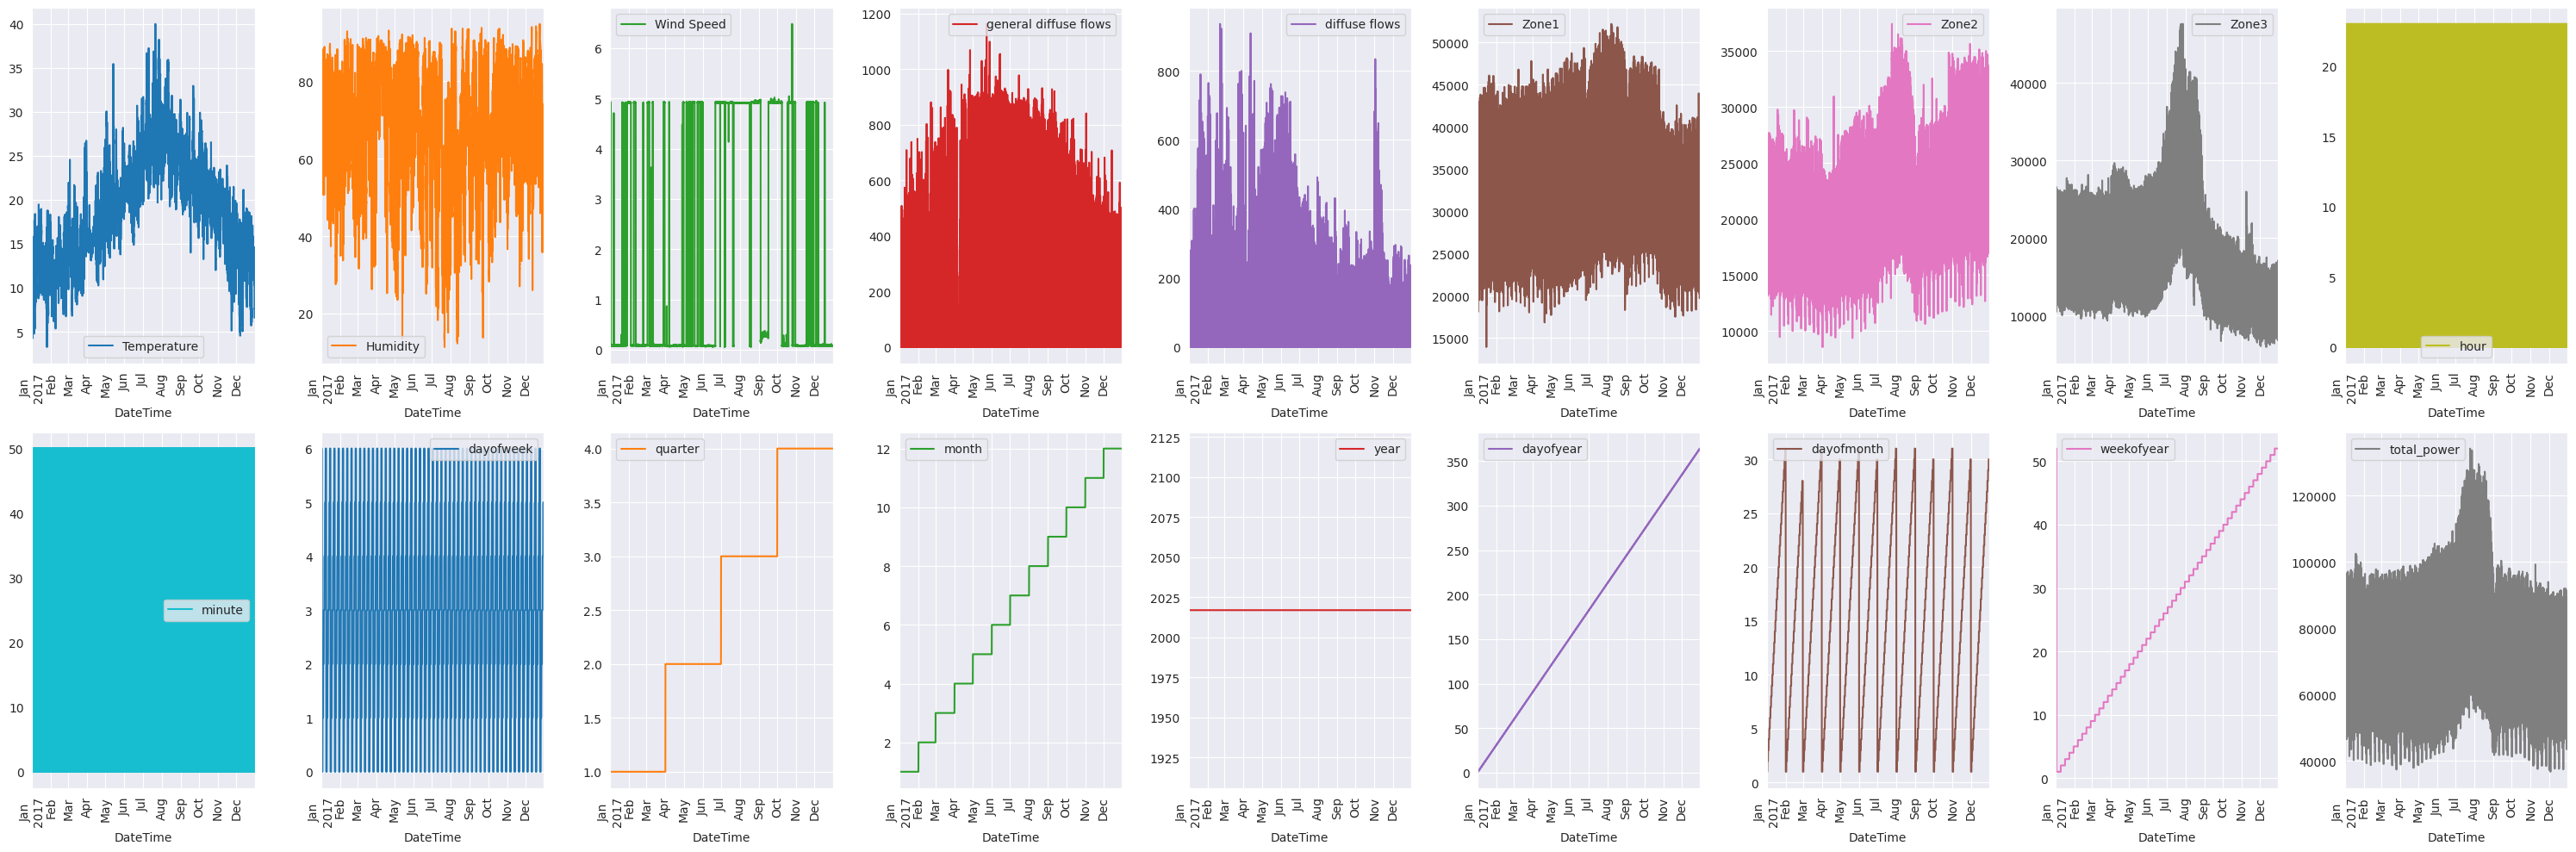

In [ ]:
axes = df.plot(subplots=True, layout=(2, -1), figsize=(30,10), sharex=False)
# Loop through each subplot (i.e., each Axes object)
for ax in axes.flatten():
    # Rotate the x-axis labels for this subplot
    for label in ax.get_xticklabels():
        label.set_rotation(90)

plt.tight_layout()
plt.show()

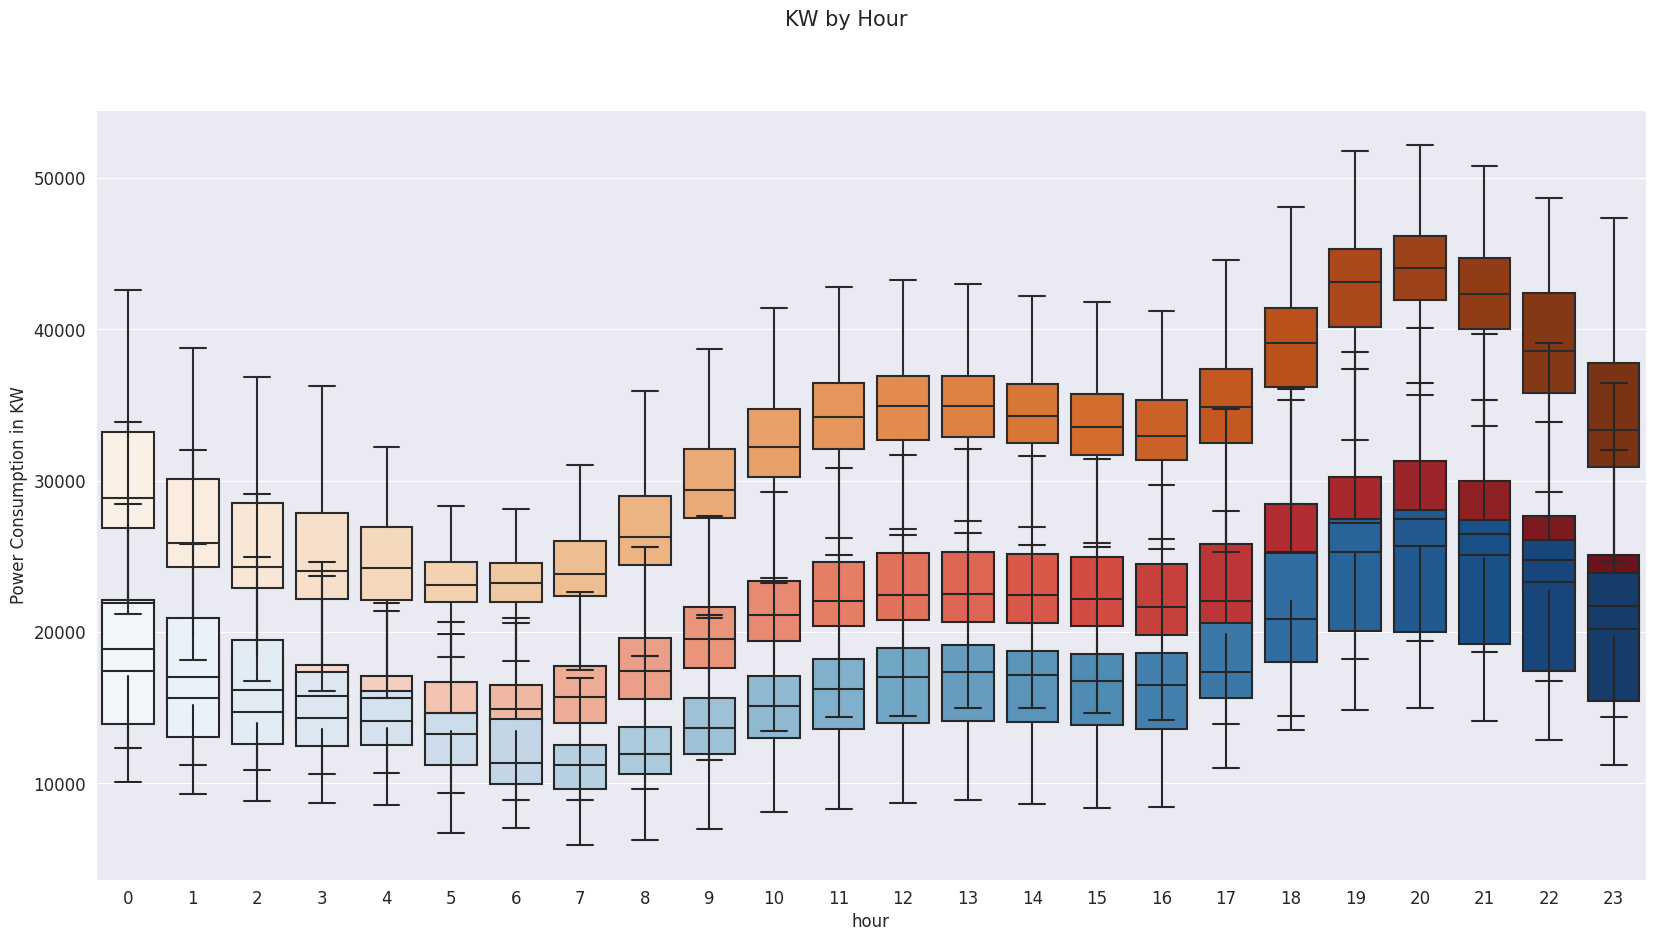

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

zone1 = sns.boxplot(data=df, x='hour', y='Zone1', palette = 'Oranges', showfliers=False)
zone2 = sns.boxplot(data=df, x='hour', y='Zone2', palette = 'Reds', showfliers=False)
zone3 = sns.boxplot(data=df, x='hour', y='Zone3', palette = 'Blues', showfliers=False)

plt.suptitle('KW by Hour', fontsize=15)
plt.xlabel('hour', fontsize=12)
plt.ylabel('Power Consumption in KW', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#Generating plot
plt.show()

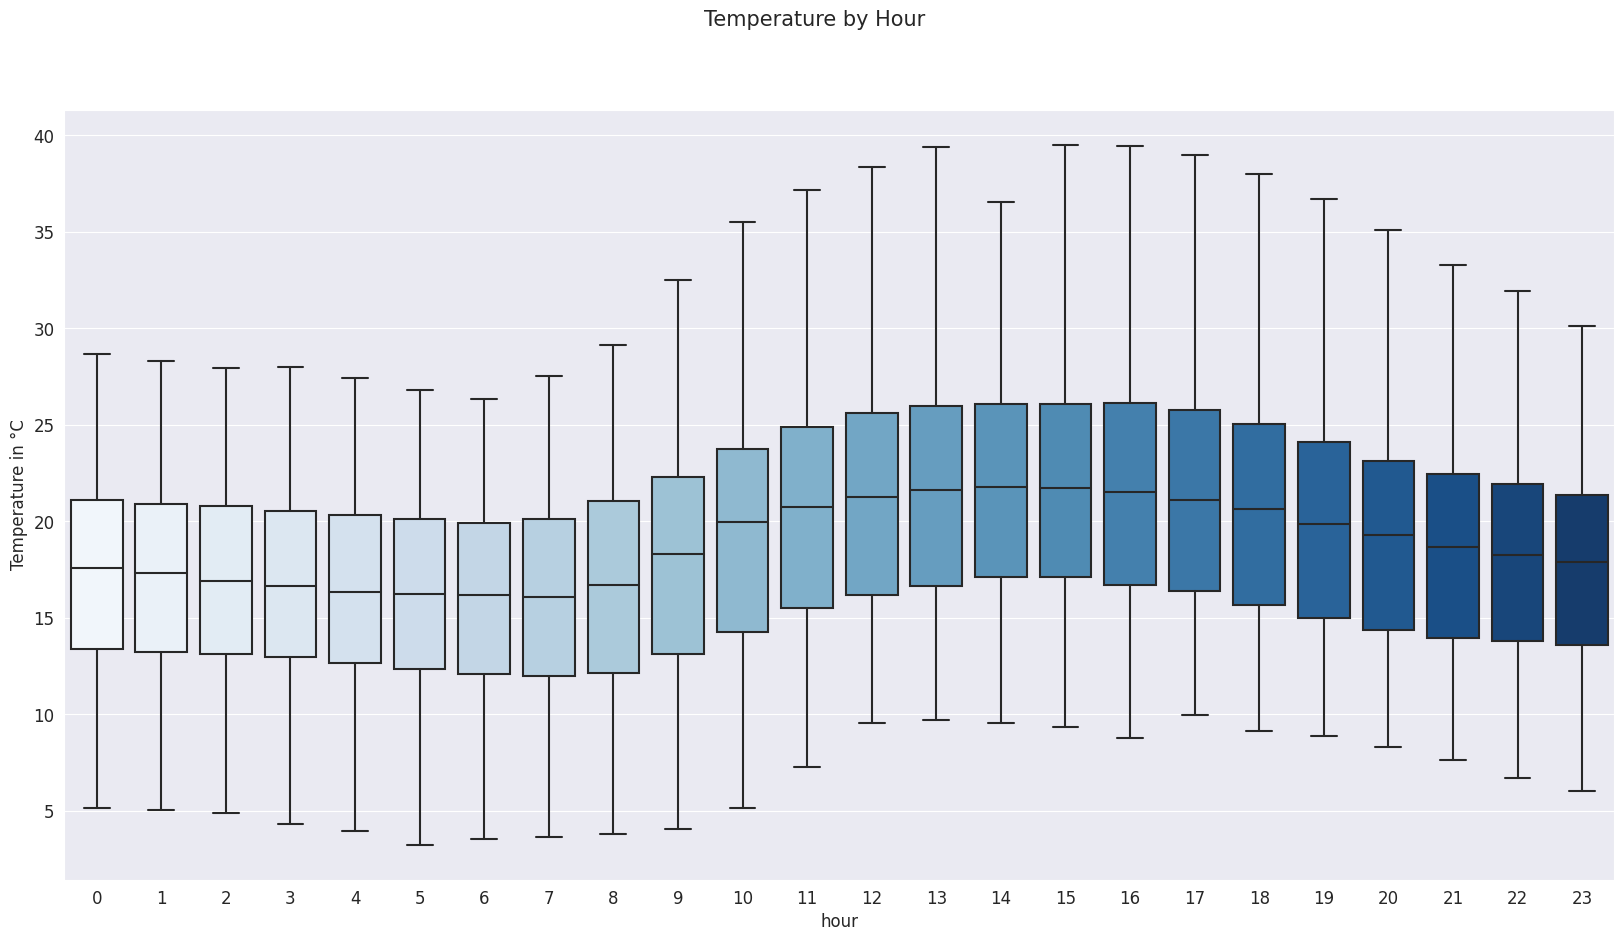

In [ ]:

fig, ax = plt.subplots(figsize=(20, 10))

sns.boxplot(data=df, x='hour', y='Temperature', palette = 'Blues', showfliers=False)

plt.suptitle('Temperature by Hour', fontsize=15)
plt.xlabel('hour', fontsize=12)
plt.ylabel('Temperature in °C', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#Generating plot
plt.show()

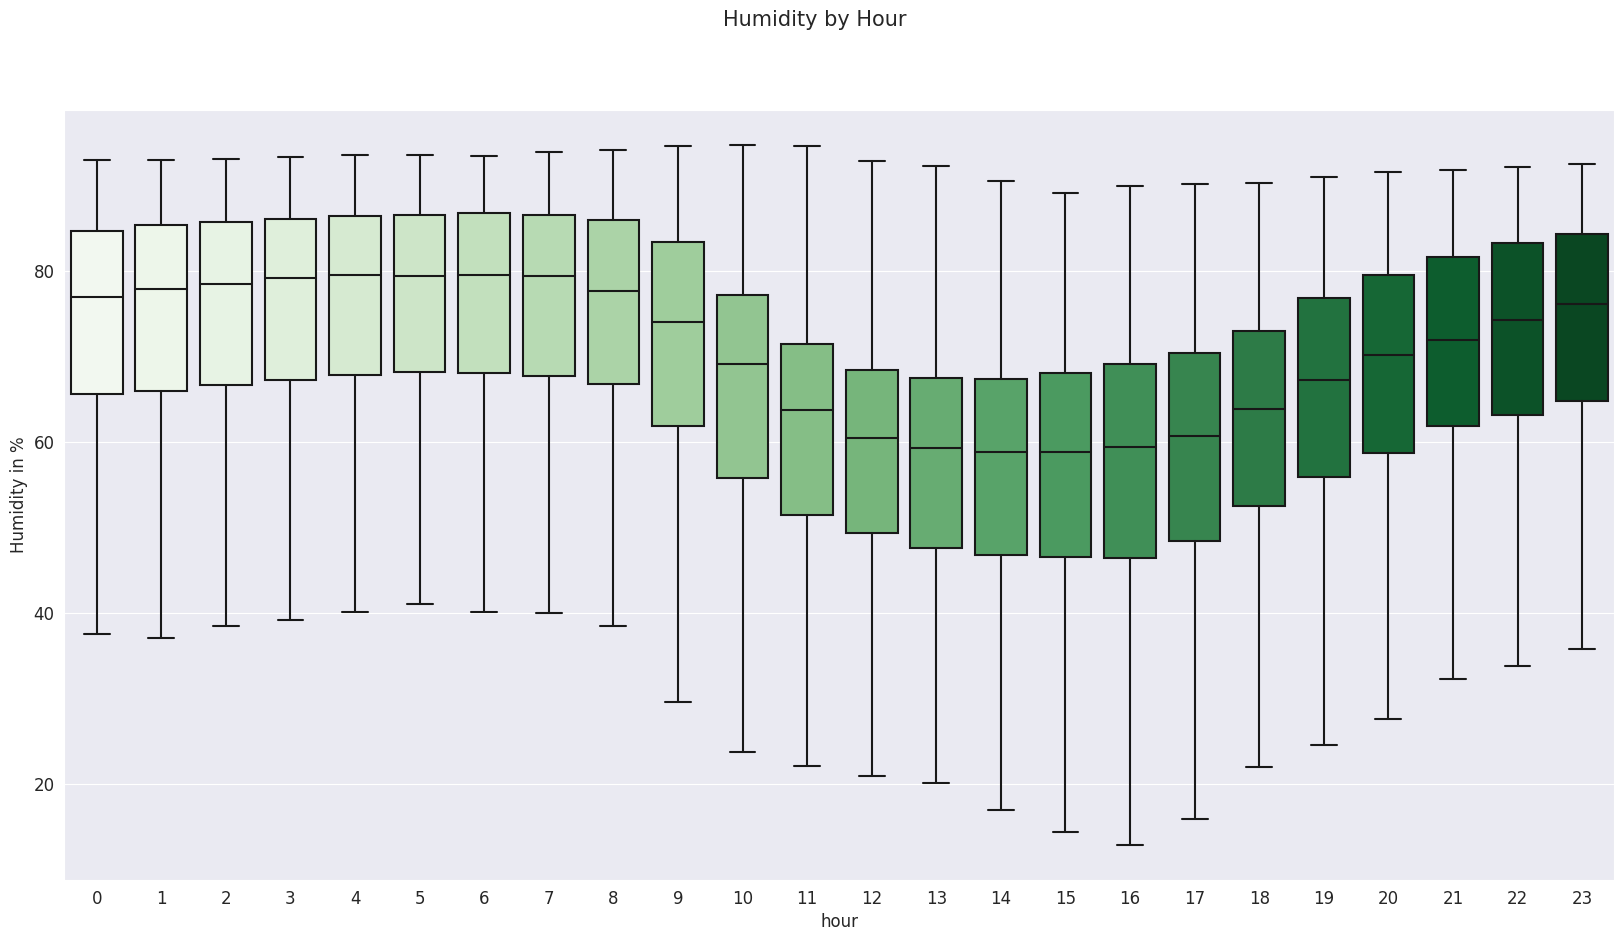

In [ ]:

fig, ax = plt.subplots(figsize=(20, 10))

sns.boxplot(data=df, x='hour', y='Humidity', palette = 'Greens', showfliers=False)

plt.suptitle('Humidity by Hour', fontsize=15)
plt.xlabel('hour', fontsize=12)
plt.ylabel('Humidity in %', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#Generating plot
plt.show()

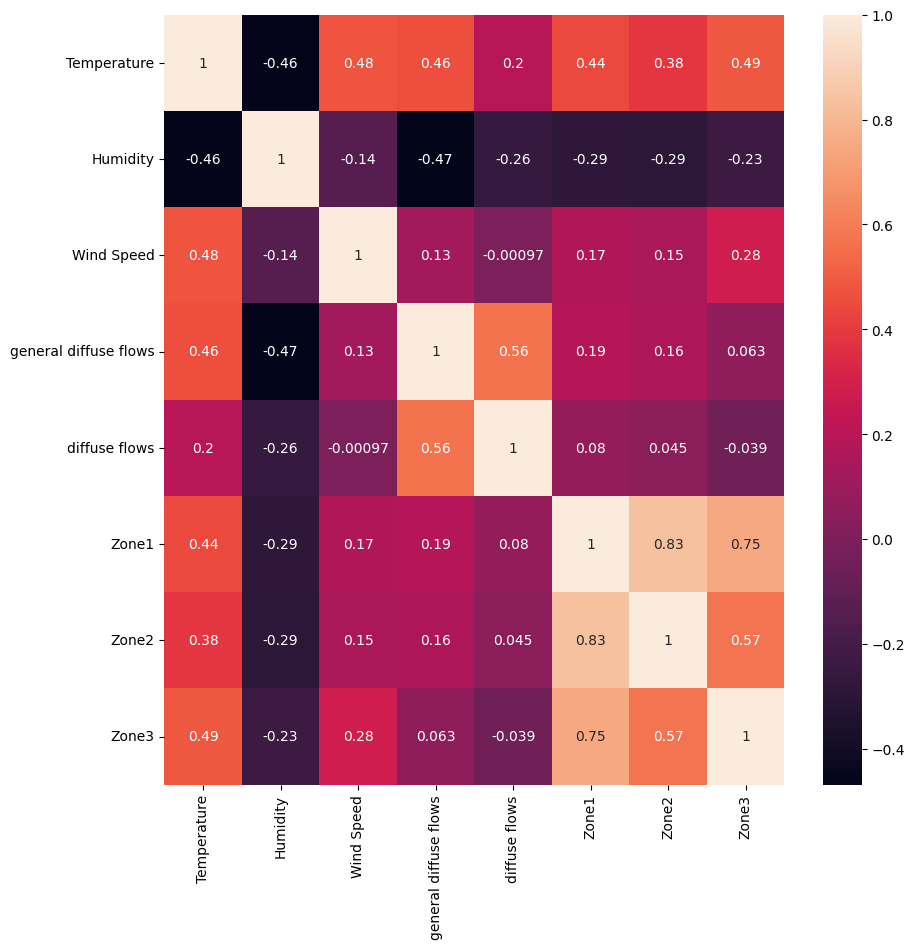

In [ ]:
##Correlation Matrix
selected_columns = df[['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'diffuse flows', 'Zone1', 'Zone2', 'Zone3']]
corr = selected_columns.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True)
plt.show()

<Axes: xlabel='DateTime'>

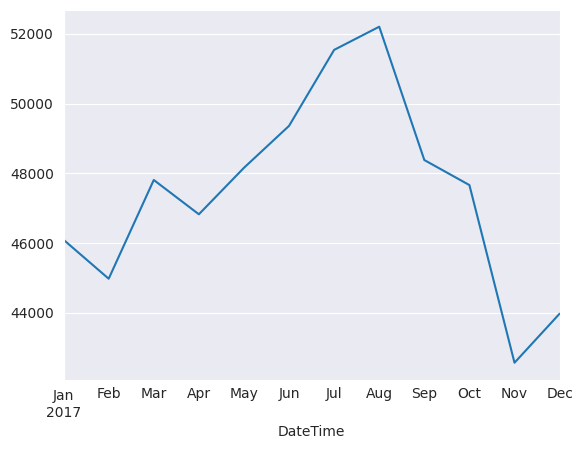

In [ ]:
df.resample(rule='M').max()['Zone1'].plot()

<Axes: xlabel='DateTime'>

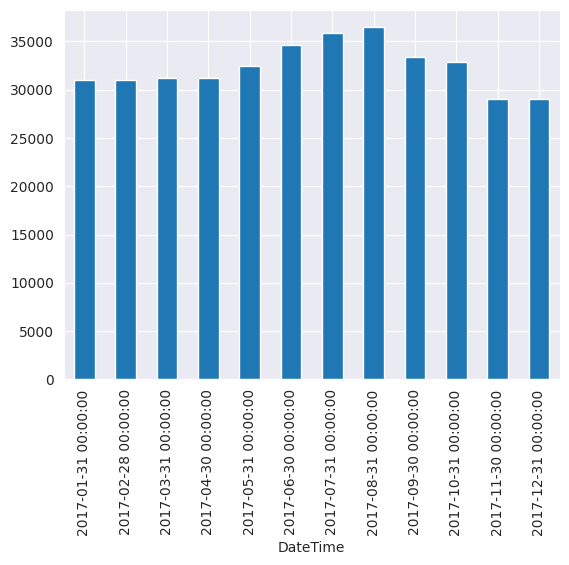

In [ ]:
df['Zone1'].resample(rule='M').mean().plot(kind='bar')

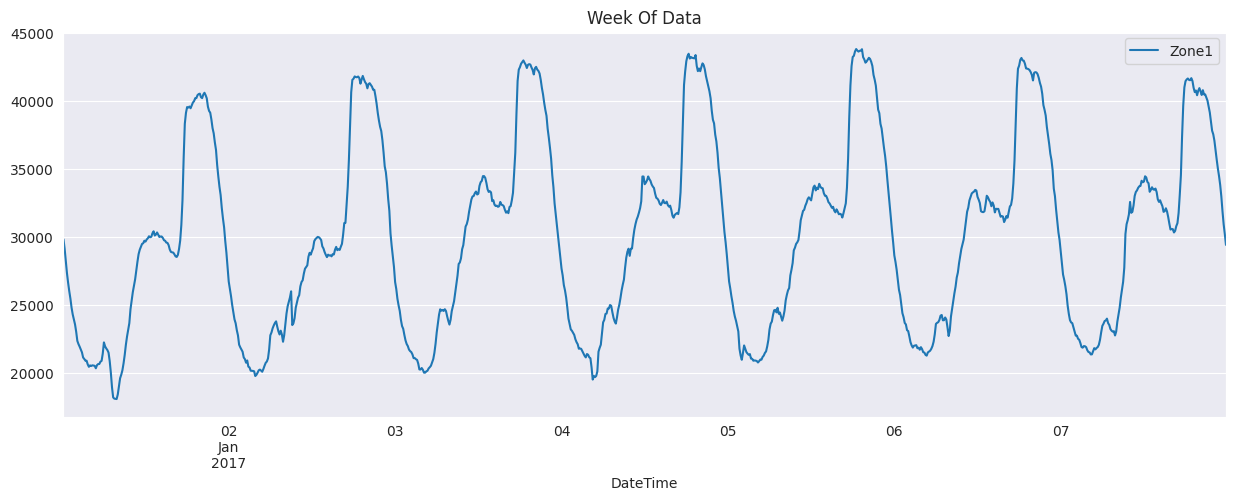

In [ ]:
df.loc[(df.index > '01-01-2017') & (df.index < '01-08-2017'), ['Zone1']] \
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()

# Feature Engineering

In [6]:
df['total_power'] = df['Zone1'] + df['Zone2'] + df['Zone3']

In [7]:
# Calculate the mean of zone1 power consumption
mean_total_power = df['total_power'].mean()

# Create a new column 'Label' based on the comparison with the mean
df['Label'] = 'Above Mean'
df.loc[df['total_power'] <= mean_total_power, 'Label'] = 'Below Mean'

In [ ]:
mean_total_power

71222.88586428425

In [ ]:
df.head(10)

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone1,Zone2,Zone3,hour,minute,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,total_power,Label
DateTime,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,0,0,6,1,1,2017,1,1,52,70425.53544,Below Mean
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,0,10,6,1,1,2017,1,1,52,69320.84387,Below Mean
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,0,20,6,1,1,2017,1,1,52,67803.22193,Below Mean
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,0,30,6,1,1,2017,1,1,52,65489.23209,Below Mean
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,0,40,6,1,1,2017,1,1,52,63650.44627,Below Mean
2017-01-01 00:50:00,5.853,76.9,0.081,0.059,0.108,26624.81013,17416.41337,18130.12048,0,50,6,1,1,2017,1,1,52,62171.34398,Below Mean
2017-01-01 01:00:00,5.641,77.7,0.080,0.048,0.096,25998.98734,16993.31307,17945.06024,1,0,6,1,1,2017,1,1,52,60937.36065,Below Mean
2017-01-01 01:10:00,5.496,78.2,0.085,0.055,0.093,25446.07595,16661.39818,17459.27711,1,10,6,1,1,2017,1,1,52,59566.75124,Below Mean
2017-01-01 01:20:00,5.678,78.1,0.081,0.066,0.141,24777.72152,16227.35562,17025.54217,1,20,6,1,1,2017,1,1,52,58030.61931,Below Mean


# Model Training of Linear Regression(SGDRegressor) and Linear SVC

In [8]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable 'Label' to numerical values
label_encoder = LabelEncoder()
df['Encoded_Label'] = label_encoder.fit_transform(df['Label'])

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDRegressor
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Creating features 'X' and target 'y' for modeling
X = df[['Temperature', 'hour']]
y = df['Encoded_Label']

# Initialize Random Oversampler
oversampler = RandomOverSampler()

# Perform random oversampling
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# List of learning rates for SGDRegressor
learning_rates = [0.000001,0.00001, 0.0001, 0.001, 0.01, 0.1, 1]

# List of regularization parameter C for LinearSVC
regularization_params = [0.0001,0.001,0.1, 0.01, 1, 10, 20]

# Stratified KFold with 5 splits
skf = StratifiedKFold(n_splits=5)

# Set the threshold for binary classification
threshold = 0.5

# Initialize lists to store results
sgd_regression_scores = {}
sgd_classification_scores = {}
linear_svc_scores = {}

for rate in learning_rates:
    sgd_reg = SGDRegressor(learning_rate='constant', eta0=rate)
    sgd_reg_scores = []
    sgd_class_scores = []  # Store classification scores
    for train_index, test_index in skf.split(X_resampled, y_resampled):
        X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
        y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

        sgd_reg.fit(X_train, y_train)
        sgd_reg_pred = sgd_reg.predict(X_test)

        # Calculate Mean Squared Error (MSE)
        mse = np.mean((y_test - sgd_reg_pred) ** 2)
        sgd_reg_scores.append(mse)

        # Applying threshold for binary classification
        predicted_classes = (sgd_reg_pred > threshold).astype(int)
        accuracy = accuracy_score(y_test, predicted_classes)
        sgd_class_scores.append(accuracy)

    sgd_regression_scores[rate] = np.mean(sgd_reg_scores)
    sgd_classification_scores[rate] = np.mean(sgd_class_scores)

for c_param in regularization_params:
    linear_svc = LinearSVC(C=c_param)
    linear_svc_scores[c_param] = cross_val_score(linear_svc, X_resampled, y_resampled, cv=skf, scoring='f1').mean()

# Display scores for SGDRegressor
print("SGDRegressor Cross-Validation Accuracy Scores (with Random Oversampling):")
for rate, score in sgd_regression_scores.items():
    print(f"Learning Rate: {rate}, Average MSE: {score}")

# Display classification scores for SGDRegressor using threshold
print("SGDRegressor Cross-Validation Accuracy Scores (with Threshold):")
for rate, score in sgd_classification_scores.items():
    print(f"Learning Rate: {rate}, Average Accuracy (with Threshold): {score}")

# Display scores for LinearSVC
print("Linear SVC Cross-Validation F1-scores (with Random Oversampling):")
for param, score in linear_svc_scores.items():
    print(f"C parameter: {param}, Average F1-score: {score}")


SGDRegressor Cross-Validation Accuracy Scores (with Random Oversampling):
Learning Rate: 1e-06, Average MSE: 0.30999540187174235
Learning Rate: 1e-05, Average MSE: 0.16986211483145236
Learning Rate: 0.0001, Average MSE: 0.15010496055763872
Learning Rate: 0.001, Average MSE: 0.17992878180306687
Learning Rate: 0.01, Average MSE: 1.3708787849179758e+25
Learning Rate: 0.1, Average MSE: 1.790843406123613e+27
Learning Rate: 1, Average MSE: 2.288364602799148e+29
SGDRegressor Cross-Validation Accuracy Scores (with Threshold):
Learning Rate: 1e-06, Average Accuracy (with Threshold): 0.48299104791995784
Learning Rate: 1e-05, Average Accuracy (with Threshold): 0.79980691592066
Learning Rate: 0.0001, Average Accuracy (with Threshold): 0.8044409338248201
Learning Rate: 0.001, Average Accuracy (with Threshold): 0.7364226786027733
Learning Rate: 0.01, Average Accuracy (with Threshold): 0.5
Learning Rate: 0.1, Average Accuracy (with Threshold): 0.5048095488853782
Learning Rate: 1, Average Accuracy (wi

# Linear regression with GridSearchCV

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor

# Define the parameter grid for GridSearchCV
param_grid_sgd = {
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'optimal'],
    'eta0': [0.00001, 0.0001, 0.001, 0.01]
}

# Initialize the SGDRegressor
sgd_reg = SGDRegressor()

# Create GridSearchCV instance
sgd_reg_grid = GridSearchCV(sgd_reg, param_grid_sgd, cv=5, scoring='neg_mean_squared_error')

# Fit the model
sgd_reg_grid.fit(X_resampled, y_resampled)

# Get the best parameters and best score
best_params_sgd = sgd_reg_grid.best_params_
best_estimator_sgd = sgd_reg_grid.best_estimator_

# Use the best estimator to make predictions
sgd_reg_pred = best_estimator_sgd.predict(X_resampled)

# Define threshold for binary classification
threshold = 0.5
predicted_classes = (sgd_reg_pred > threshold).astype(int)

# Calculate accuracy based on predictions
accuracy = accuracy_score(y_resampled, predicted_classes)

print("Best Parameters for SGDRegressor:", best_params_sgd)
print("Best Accuracy for SGDRegressor with Threshold:", accuracy)




Best Parameters for SGDRegressor: {'alpha': 0.001, 'eta0': 0.01, 'learning_rate': 'optimal'}
Best Accuracy for SGDRegressor with Threshold: 0.6422327540810953


# Linear SVC model training with RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import LinearSVC

# Define the parameter distributions for RandomizedSearchCV
param_dist_linear_svc = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 20],
    'class_weight': [None, 'balanced'],
    'penalty': ['l1', 'l2']
}

# Initialize the LinearSVC
linear_svc = LinearSVC()

# Create RandomizedSearchCV instance
linear_svc_random = RandomizedSearchCV(linear_svc, param_distributions=param_dist_linear_svc, n_iter=10, cv=5, scoring='f1')

# Fit the model
linear_svc_random.fit(X_resampled, y_resampled)

# Get the best parameters and best score
best_params_linear_svc = linear_svc_random.best_params_
best_score_linear_svc = linear_svc_random.best_score_

print("Best Parameters for LinearSVC:", best_params_linear_svc)
print("Best F1 Score for LinearSVC:", best_score_linear_svc)


Best Parameters for LinearSVC: {'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.001}
Best F1 Score for LinearSVC: 0.7953947837969443
